In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd


In [2]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Анализ данных/Python/Python кейс/amazon_market_data.csv')

In [3]:
df

,Order Date,Row ID,Order ID,Ship Mode,Customer ID,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,01-01-20,849,CA-2017-107503,Standard Class,GA-14725,Consumer,United States,Lorain,Ohio,44052,East,FUR-FU-10003878,Furniture,Furnishings,"Linden 10"" Round Wall Clock, Black",48.896,4,0.2,8.5568
1,01-01-20,4010,CA-2017-144463,Standard Class,SC-20725,Consumer,United States,Los Angeles,California,90036,West,FUR-FU-10001215,Furniture,Furnishings,"Howard Miller 11-1/2"" Diameter Brentwood Wall ...",474.430,11,0.0,199.2606
2,01-01-20,6683,CA-2017-154466,First Class,DP-13390,Home Office,United States,Franklin,Wisconsin,53132,Central,OFF-BI-10002012,Office Supplies,Binders,Wilson Jones Easy Flow II Sheet Lifters,3.600,2,0.0,1.7280
3,01-01-20,8070,CA-2017-151750,Standard Class,JM-15250,Consumer,United States,Huntsville,Texas,77340,Central,OFF-ST-10002743,Office Supplies,Storage,SAFCO Boltless Steel Shelving,454.560,5,0.2,-107.9580
4,01-01-20,8071,CA-2017-151750,Standard Class,JM-15250,Consumer,United States,Huntsville,Texas,77340,Central,FUR-FU-10002116,Furniture,Furnishings,"Tenex Carpeted, Granite-Look or Clear Contempo...",141.420,5,0.6,-187.3815
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3307,30-12-20,908,CA-2017-143259,Standard Class,PO-18865,Consumer,United States,New York City,New York,10009,East,TEC-PH-10004774,Technology,Phones,Gear Head AU3700S Headset,90.930,7,0.0,2.7279
3308,30-12-20,909,CA-2017-143259,Standard Class,PO-18865,Consumer,United States,New York City,New York,10009,East,OFF-BI-10003684,Office Supplies,Binders,Wilson Jones Legal Size Ring Binders,52.776,3,0.2,19.7910
3309,30-12-20,1297,CA-2017-115427,Standard Class,EB-13975,Corporate,United States,Fairfield,California,94533,West,OFF-BI-10002103,Office Supplies,Binders,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",13.904,2,0.2,4.5188
3310,30-12-20,1298,CA-2017-115427,Standard Class,EB-13975,Corporate,United States,Fairfield,California,94533,West,OFF-BI-10004632,Office Supplies,Binders,GBC Binding covers,20.720,2,0.2,6.4750


In [4]:
df.columns

Index(['Order Date', 'Row ID', 'Order ID', 'Ship Mode', 'Customer ID',
       'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region',
       'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Sales',
       'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [5]:
# Удаляем пробелы из названий столбцов
df.columns = df.columns.str.replace(' ', '_')

# Преобразуем названия столбцов в camelCase
df.columns = [
    column.lower().replace('_', '').capitalize() for column in df.columns
]

# Удаляем пропуски
df.dropna(inplace=True)

In [6]:
df.columns

Index(['Orderdate', 'Rowid', 'Orderid', 'Shipmode', 'Customerid', 'Segment',
       'Country', 'City', 'State', 'Postalcode', 'Region', 'Productid',
       'Category', 'Sub-category', 'Productname', 'Sales', 'Quantity',
       'Discount', 'Profit'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3312 entries, 0 to 3311
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Orderdate     3312 non-null   object 
 1   Rowid         3312 non-null   int64  
 2   Orderid       3312 non-null   object 
 3   Shipmode      3312 non-null   object 
 4   Customerid    3312 non-null   object 
 5   Segment       3312 non-null   object 
 6   Country       3312 non-null   object 
 7   City          3312 non-null   object 
 8   State         3312 non-null   object 
 9   Postalcode    3312 non-null   int64  
 10  Region        3312 non-null   object 
 11  Productid     3312 non-null   object 
 12  Category      3312 non-null   object 
 13  Sub-category  3312 non-null   object 
 14  Productname   3312 non-null   object 
 15  Sales         3312 non-null   float64
 16  Quantity      3312 non-null   int64  
 17  Discount      3312 non-null   float64
 18  Profit        3312 non-null 

#Исследование

In [8]:
import pandas as pd

# Вычисляем количество уникальных заказов
unique_orders = df['Orderid'].nunique()

# Вычисляем количество уникальных клиентов
unique_customers = df['Customerid'].nunique()

# Выводим результаты
print(f'Количество уникальных заказов: {unique_orders}')
print(f'Количество уникальных клиентов: {unique_customers}')


Количество уникальных заказов: 1687
Количество уникальных клиентов: 693


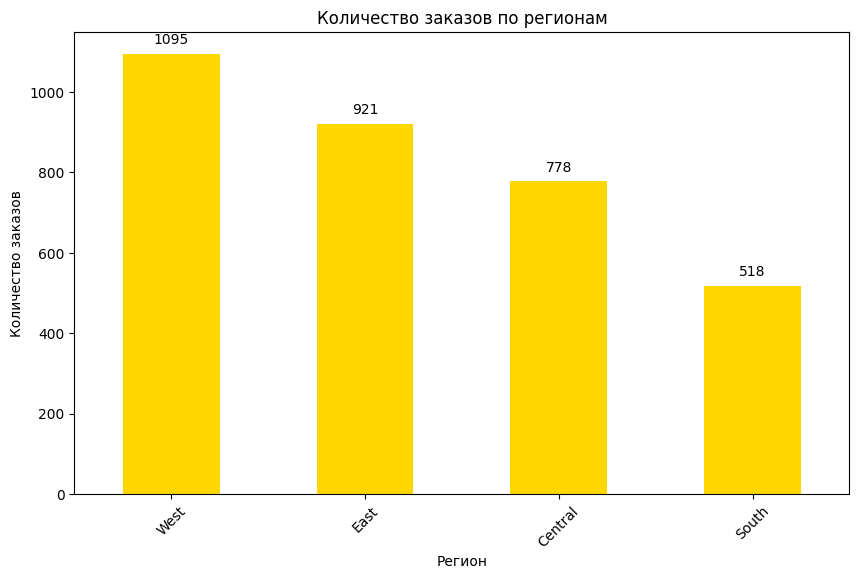

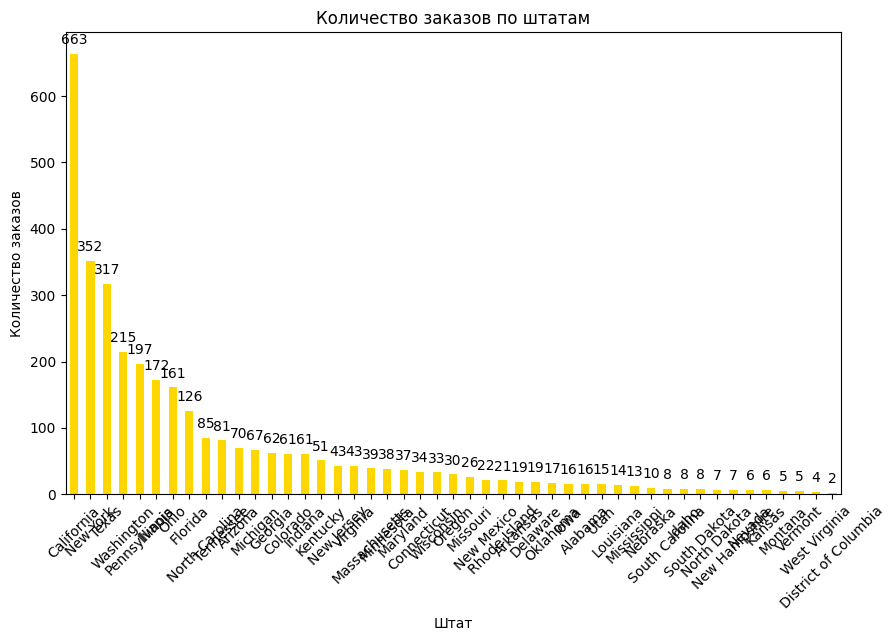

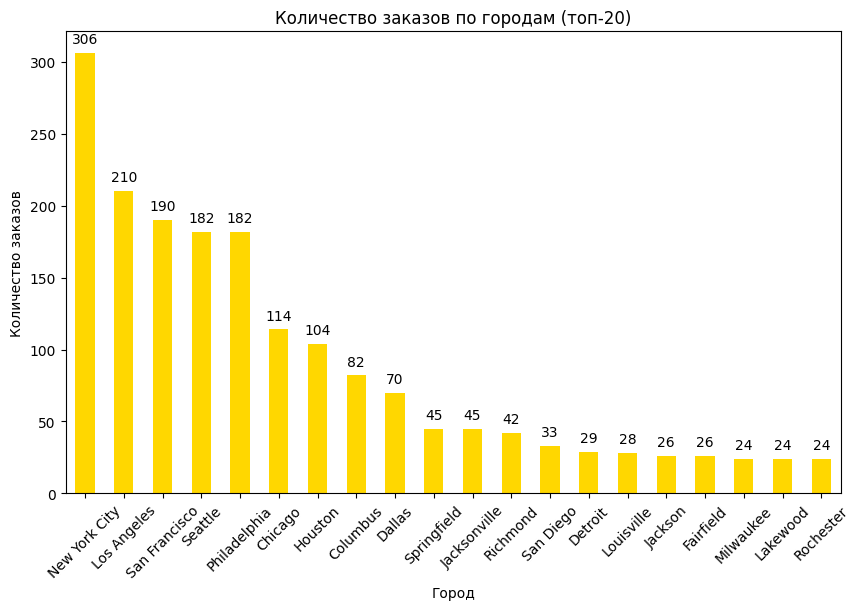

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Настраиваем цветовые параметры
color = '#FFD700'  # Желтый цвет

# Строим столбчатые диаграммы

# 1. По регионам
plt.figure(figsize=(10, 6))
ax = df['Region'].value_counts().plot(kind='bar', color=color)
plt.title('Количество заказов по регионам')
plt.xlabel('Регион')
plt.ylabel('Количество заказов')
plt.xticks(rotation=45)

# Добавляем подписи значений вертикально
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=(0, 10),
                   textcoords='offset points')

plt.show()

# 2. По штатам
plt.figure(figsize=(10, 6))
ax = df['State'].value_counts().plot(kind='bar', color=color)
plt.title('Количество заказов по штатам')
plt.xlabel('Штат')
plt.ylabel('Количество заказов')
plt.xticks(rotation=45)

# Добавляем подписи значений вертикально
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=(0, 10),
                   textcoords='offset points')

plt.show()

# 3. По городам
plt.figure(figsize=(10, 6))
ax = df['City'].value_counts().head(20).plot(kind='bar', color=color)  # Отображаем 20 самых популярных городов
plt.title('Количество заказов по городам (топ-20)')
plt.xlabel('Город')
plt.ylabel('Количество заказов')
plt.xticks(rotation=45)

# Добавляем подписи значений вертикально
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=(0, 10),
                   textcoords='offset points')

plt.show()



Выводы
Распределение Топ-20 заказов по географии следующее:
1. По регионам:
- наибольшее количество заказов из региона West - 1095,
- наименьшее количество заказов из региона South - 518
2. По штатам:
- больше всего заказов штат California - 306
- меньше всего заказов из Distict of Columbia - 2
3. По городам:
- больше всего заказов сделано в New York - 663
- меньше всего заказов в Rochester - 24

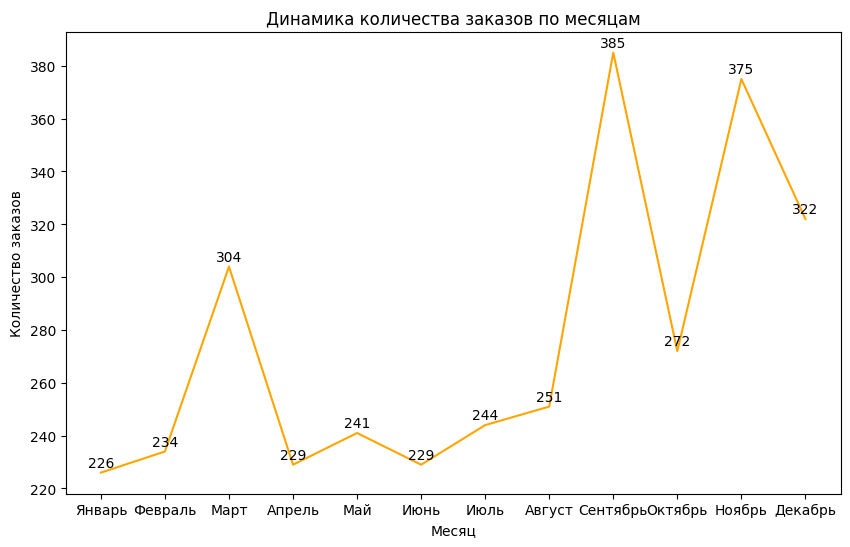

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Преобразуем столбец 'Orderdate' в формат даты
df['Orderdate'] = pd.to_datetime(df['Orderdate'])

# Группируем данные по месяцу заказа и считаем количество заказов
monthly_orders = df.groupby(df['Orderdate'].dt.month)['Orderid'].count()

# Создаем линейный график
plt.figure(figsize=(10, 6))
plt.plot(monthly_orders.index, monthly_orders.values, color='#FFA500')  # Оранжевый цвет
plt.title('Динамика количества заказов по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Количество заказов')
plt.xticks(range(1, 13), ['Январь', 'Февраль', 'Март', 'Апрель', 'Май', 'Июнь', 'Июль', 'Август', 'Сентябрь', 'Октябрь', 'Ноябрь', 'Декабрь'])

# Добавляем значения над точками графика
for i, v in enumerate(monthly_orders.values):
    plt.text(i+1, v+1, str(v), ha='center', va='bottom')

plt.show()


Вывод:
1. Наибольшее количество заказов было в марте - 304, сентябре - 385, ноябре - 375
2. Меньше всего заказов в январе - 226, апреле и июне - 229
3. Динамика заказов по дням внутри месяца представлена на графиках. Отмечены всплески количества заказов с 10 по 15 числа каждого месяца
4. С августа по декабрь интенсивность заказов внутри месяца возврастает и рапределена более равномерно

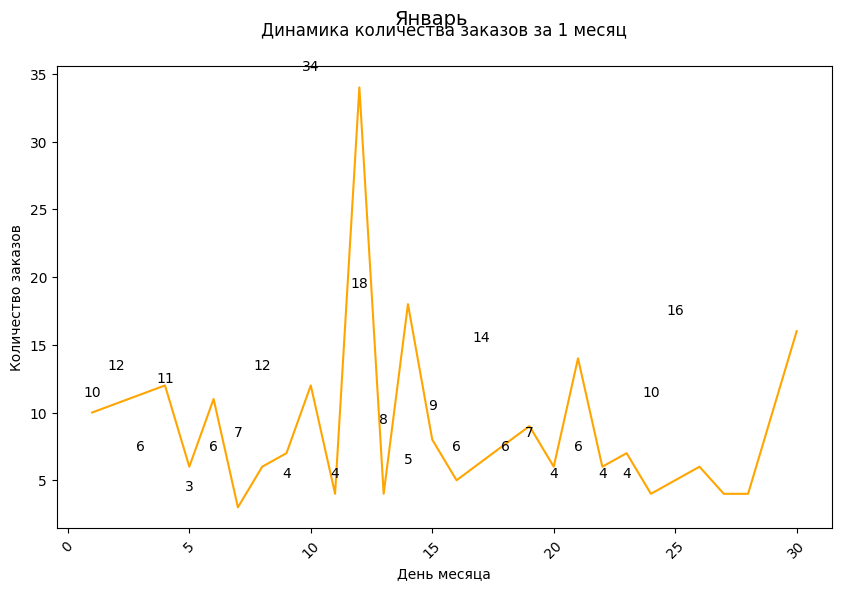

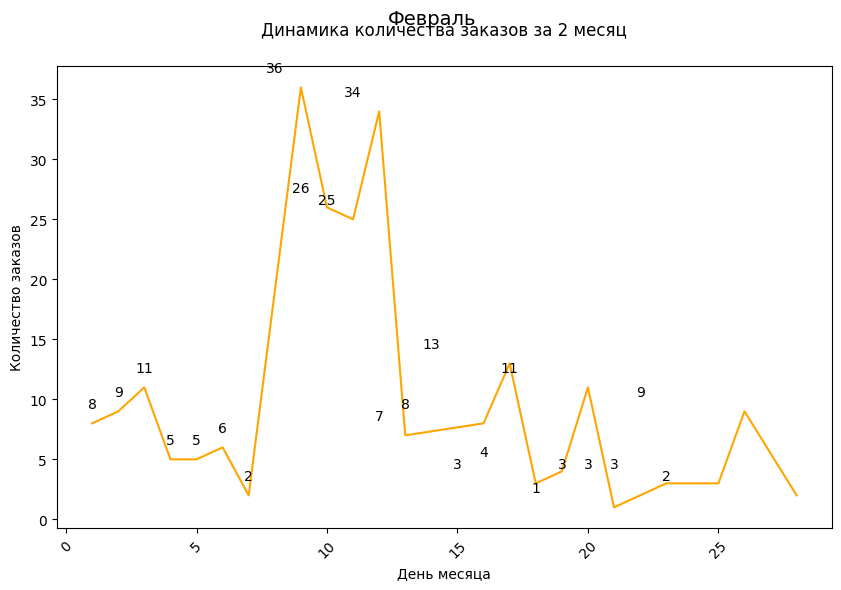

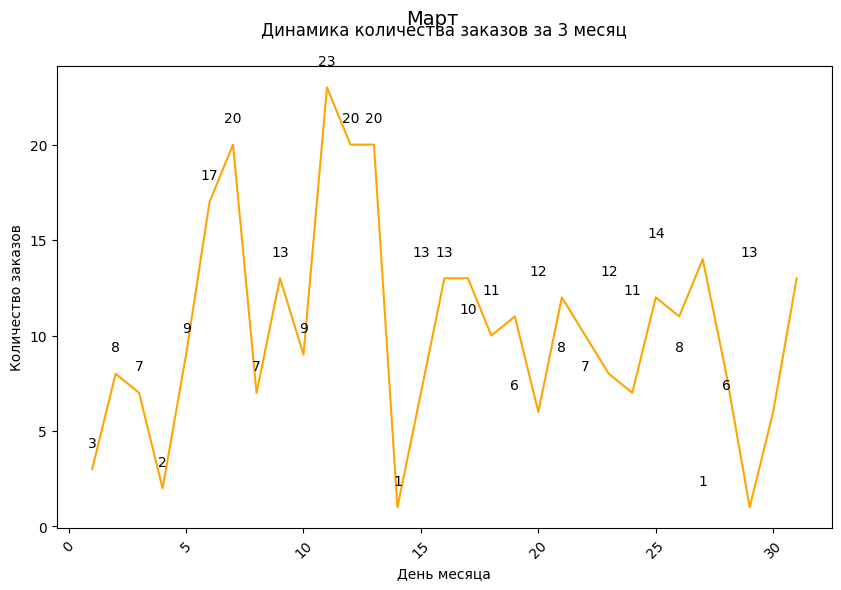

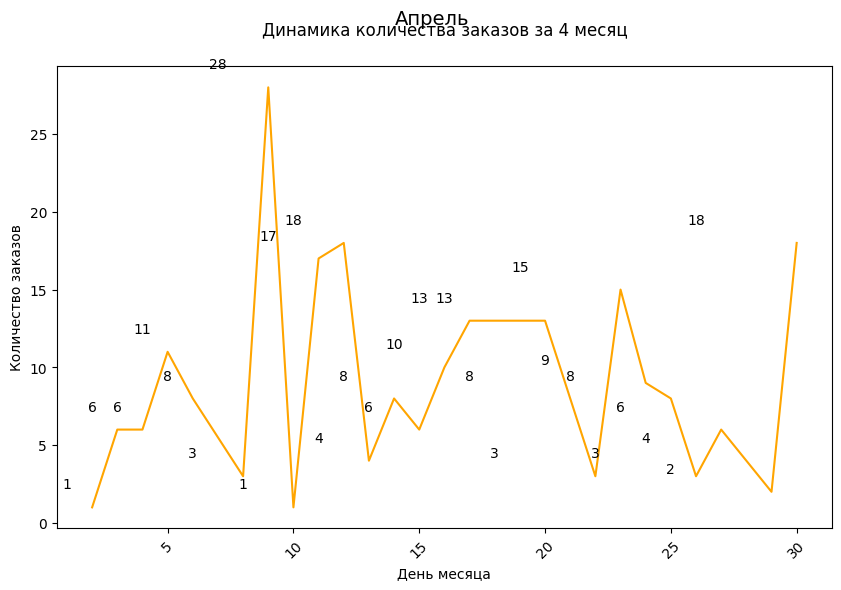

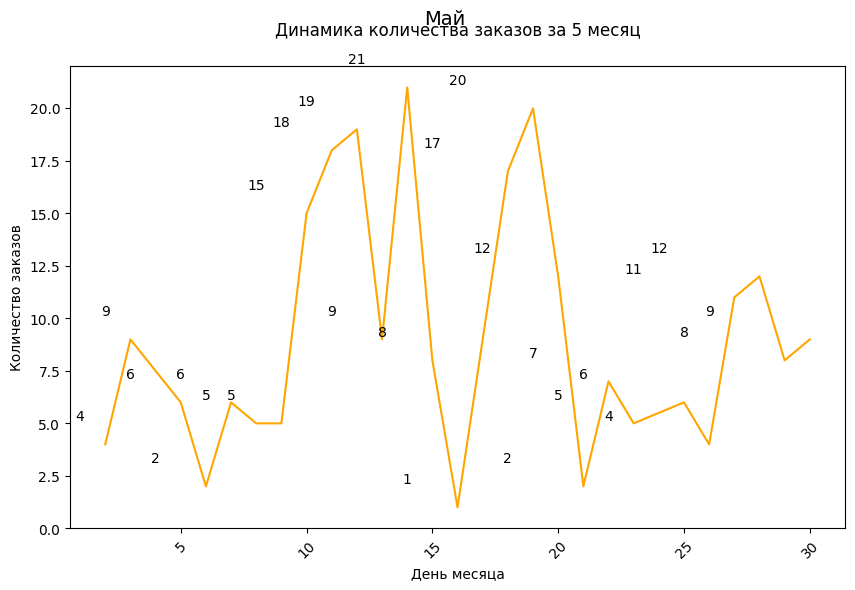

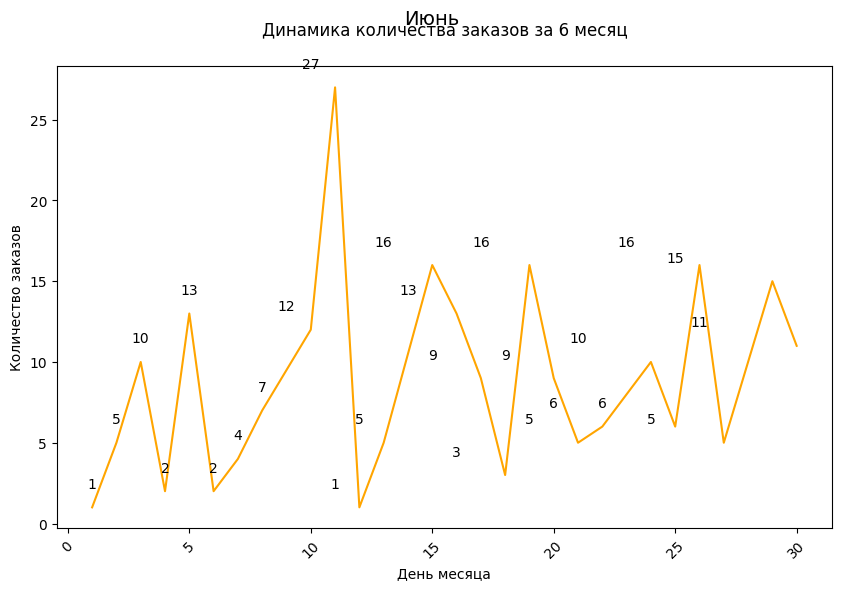

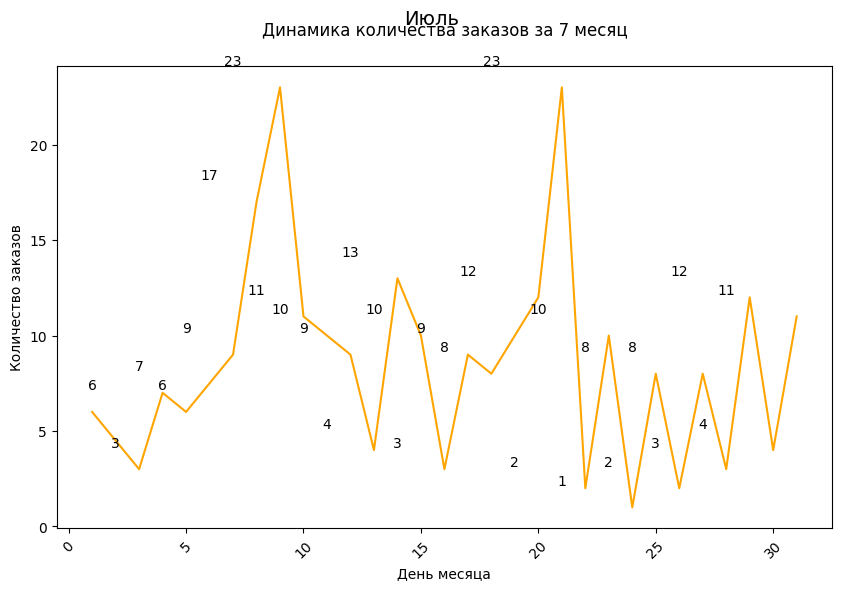

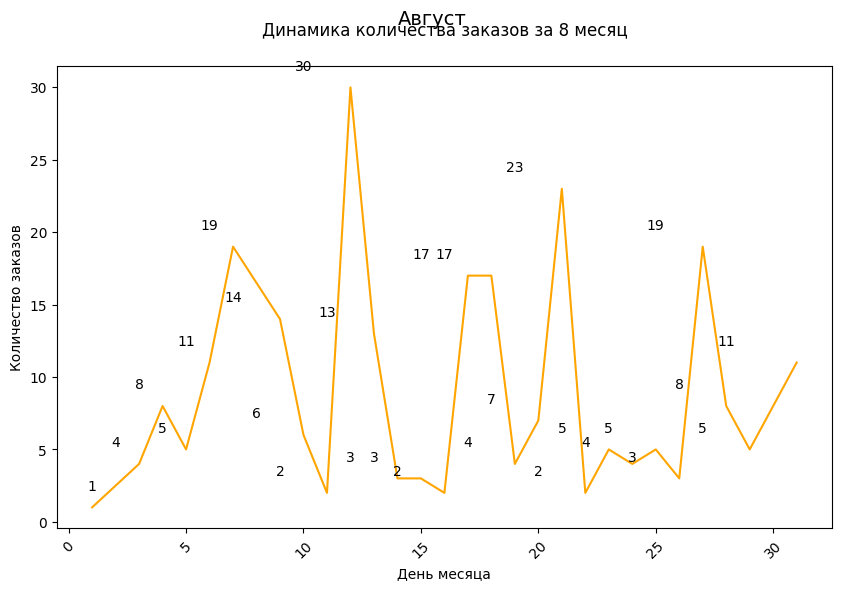

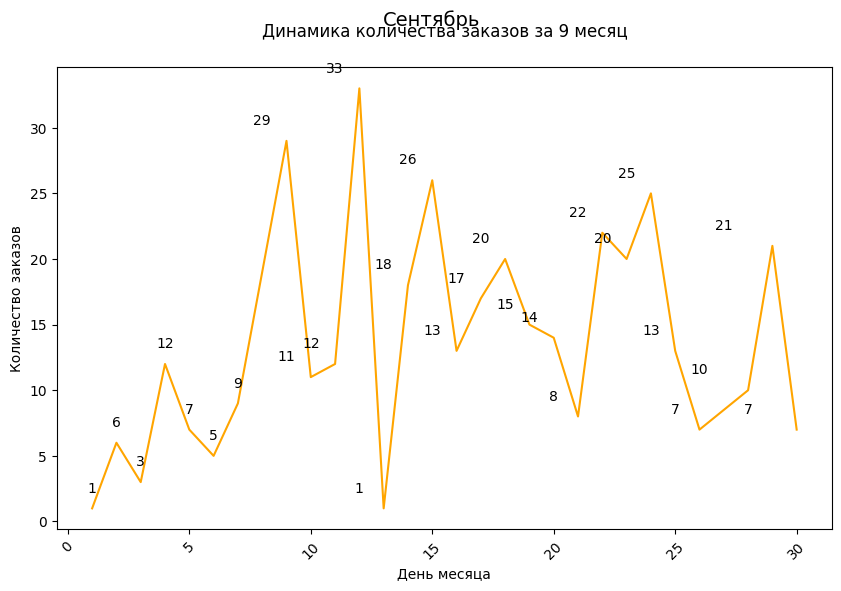

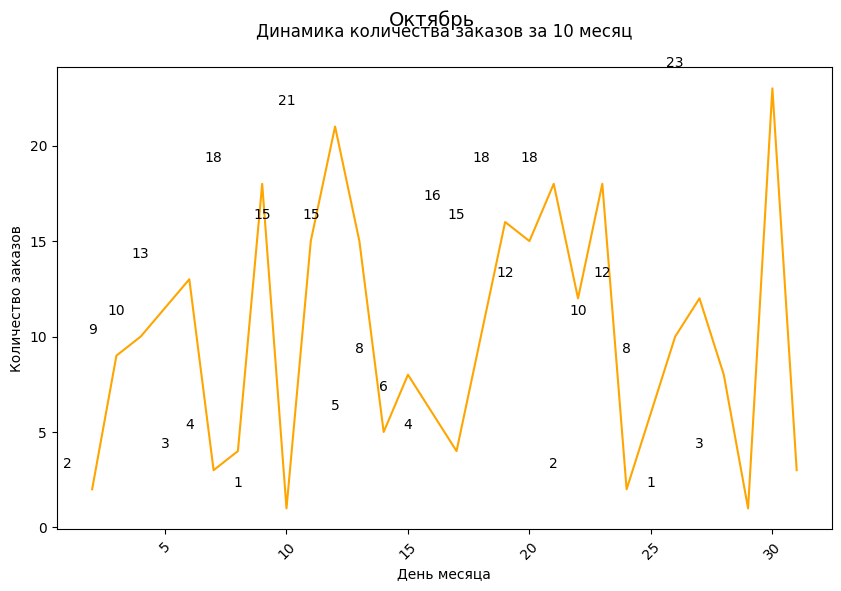

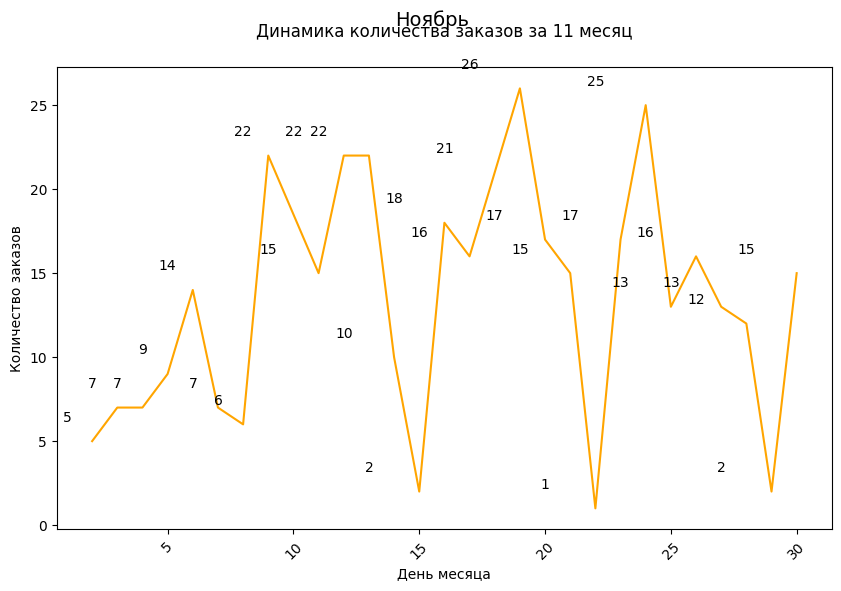

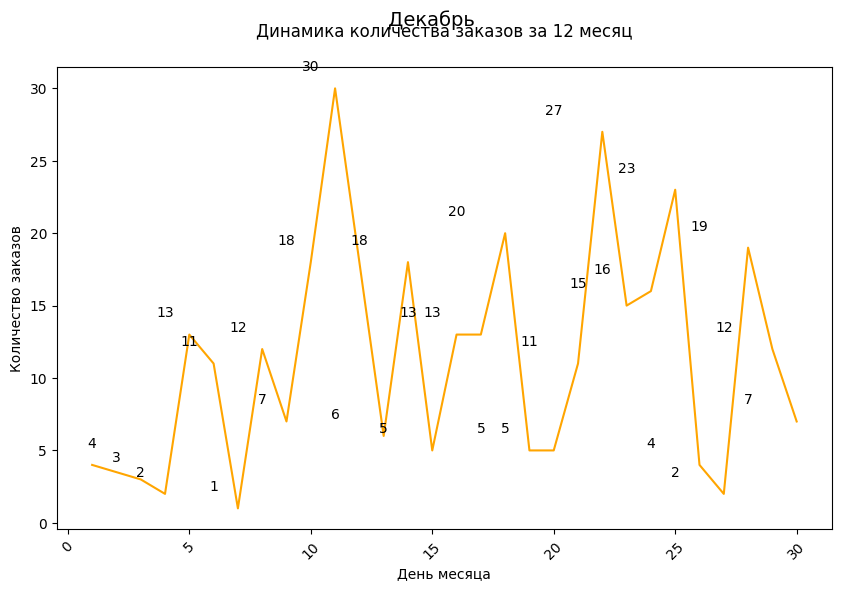

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Преобразуем столбец 'Orderdate' в формат даты
df['Orderdate'] = pd.to_datetime(df['Orderdate'])

# Группируем данные по месяцу и дате заказа
grouped_orders = df.groupby([df['Orderdate'].dt.month, df['Orderdate'].dt.day])['Orderid'].count()

# Создаем графики для каждого месяца
for month in range(1, 13):
    monthly_data = grouped_orders.loc[month]

    plt.figure(figsize=(10, 6))
    plt.plot(monthly_data.index, monthly_data.values, color='#FFA500')  # Оранжевый цвет

    # Добавляем значения над точками графика
    for i, v in enumerate(monthly_data.values):
        plt.text(i+1, v+1, str(v), ha='center', va='bottom')

    # Добавляем название месяца на график
    month_name = {
        1: 'Январь', 2: 'Февраль', 3: 'Март', 4: 'Апрель', 5: 'Май', 6: 'Июнь',
        7: 'Июль', 8: 'Август', 9: 'Сентябрь', 10: 'Октябрь', 11: 'Ноябрь', 12: 'Декабрь'
    }[month]
    plt.figtext(0.5, 0.95, month_name, ha='center', fontsize=14)  # Сдвинули вниз

    # Добавляем наименование графика
    plt.title(f'Динамика количества заказов за {month} месяц', y=1.05)  # Сдвинули вверх

    plt.xlabel('День месяца')
    plt.ylabel('Количество заказов')
    plt.xticks(rotation=45)

    plt.show()


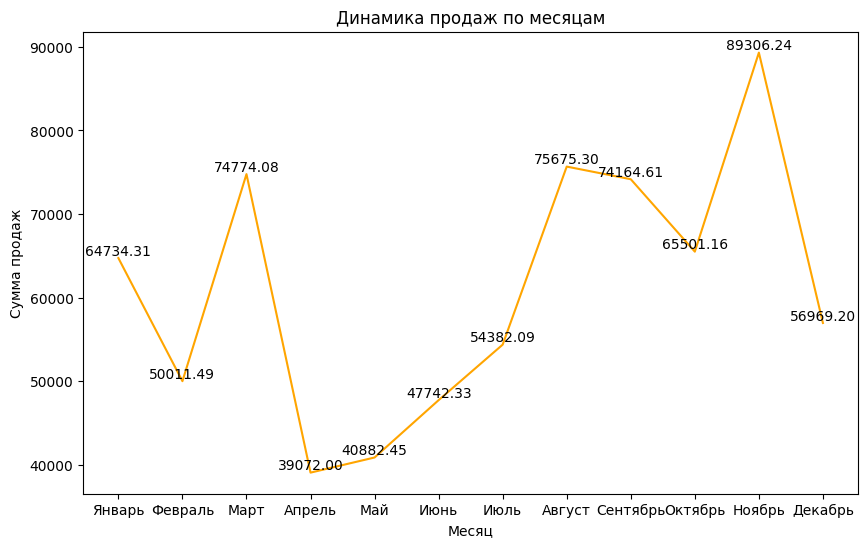

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Преобразуем столбец 'Orderdate' в формат даты
df['Orderdate'] = pd.to_datetime(df['Orderdate'])

# Группируем данные по месяцу заказа и суммируем продажи
monthly_sales = df.groupby(df['Orderdate'].dt.month)['Sales'].sum()

# Создаем линейный график
plt.figure(figsize=(10, 6))
plt.plot(monthly_sales.index, monthly_sales.values, color='#FFA500')  # Оранжевый цвет
plt.title('Динамика продаж по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Сумма продаж')
plt.xticks(range(1, 13), ['Январь', 'Февраль', 'Март', 'Апрель', 'Май', 'Июнь', 'Июль', 'Август', 'Сентябрь', 'Октябрь', 'Ноябрь', 'Декабрь'])

# Добавляем значения над точками графика
for i, v in enumerate(monthly_sales.values):
    plt.text(i+1, v+1, f'{v:.2f}', ha='center', va='bottom')

plt.show()


Выводы:
1. Максимальные продажи в ноябре - 89306, августе - 75675, марте - 74774 и сентябре - 74164
2. Минимальные продажи в аапреле 39072 и мае 40882

In [26]:
# Переименование столбца
df.rename(columns={'Sub-category': 'Subcategory'}, inplace=True)

df.columns

Index(['Orderdate', 'Rowid', 'Orderid', 'Shipmode', 'Customerid', 'Segment',
       'Country', 'City', 'State', 'Postalcode', 'Region', 'Productid',
       'Category', 'Subcategory', 'Productname', 'Sales', 'Quantity',
       'Discount', 'Profit'],
      dtype='object')

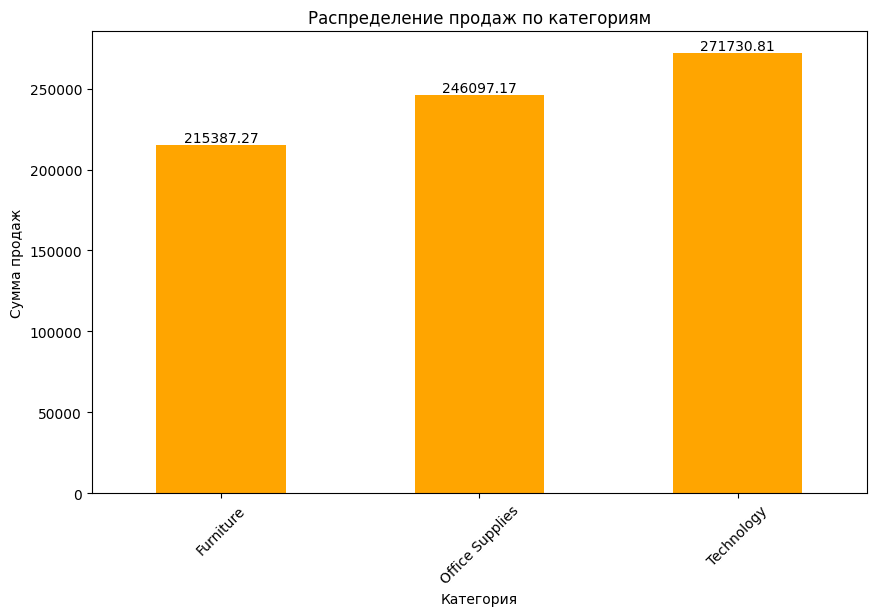

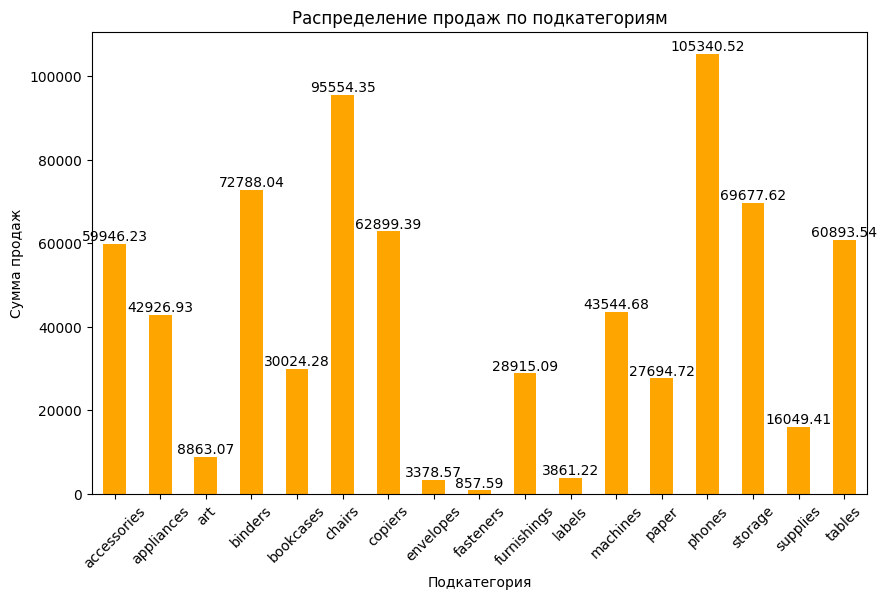

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

# Преобразуем столбец 'Orderdate' в формат даты
df['Orderdate'] = pd.to_datetime(df['Orderdate'])

# Группируем данные по категориям и суммируем продажи
category_sales = df.groupby('Category')['Sales'].sum()

# Строим столбчатую диаграмму для категорий
plt.figure(figsize=(10, 6))
ax = category_sales.plot(kind='bar', color='#FFA500')  # Оранжевый цвет
plt.title('Распределение продаж по категориям')
plt.xlabel('Категория')
plt.ylabel('Сумма продаж')
plt.xticks(rotation=45)
# Добавляем подписи значений над столбцами
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='bottom', fontsize=10)
plt.show()

# Группируем данные по подкатегориям и суммируем продажи
subcategory_sales = df.groupby('Subcategory')['Sales'].sum()

# Строим столбчатую диаграмму для подкатегорий
plt.figure(figsize=(10, 6))
ax = subcategory_sales.plot(kind='bar', color='#FFA500')  # Оранжевый цвет
plt.title('Распределение продаж по подкатегориям')
plt.xlabel('Подкатегория')
plt.ylabel('Сумма продаж')
plt.xticks(rotation=45)
# Добавляем подписи значений над столбцами
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='bottom', fontsize=10)
plt.show()


Выводы:
1. Наибольшие продажи в категории Technology - 271730
2. Наибольшие продажи в подкатегориях
- Phones - 105340
- Chairs - 95554
3. Меньше всего продажи в подкатегории Fasteners - 857

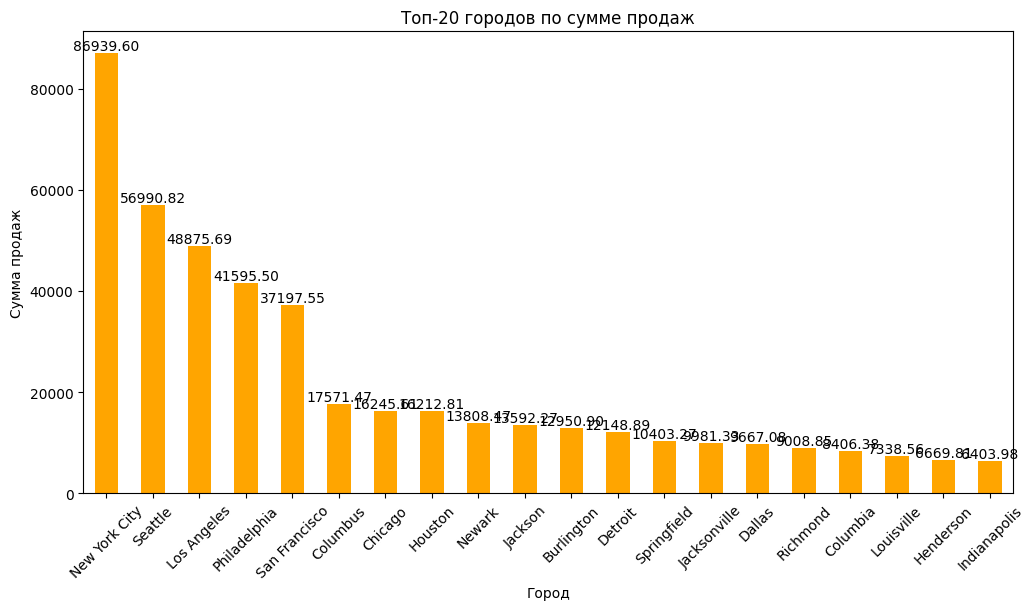

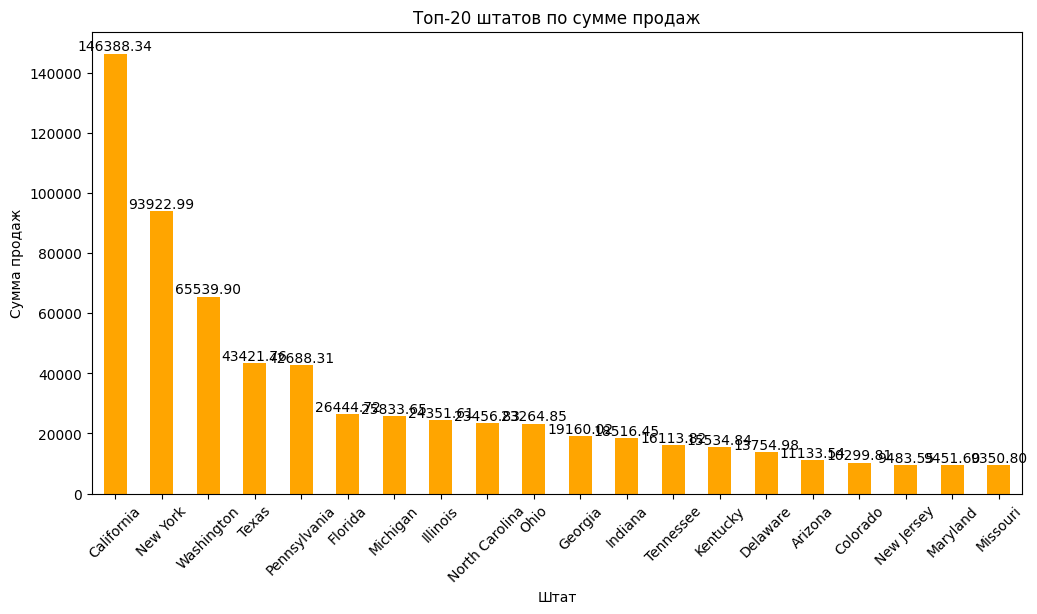

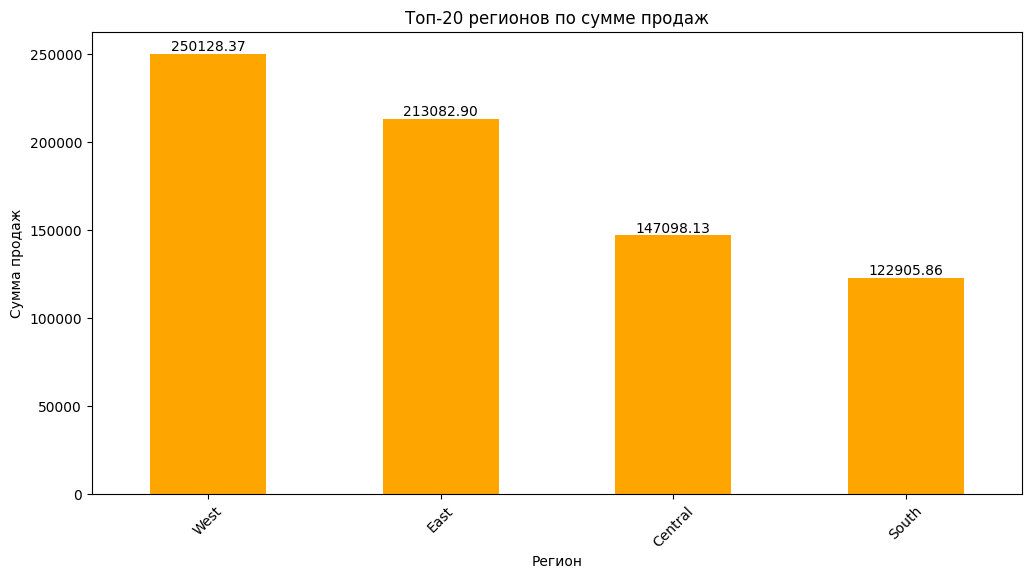

## Выводы:
- Наибольший объем продаж приходится на города Нью-Йорк, Лос-Анджелес и Сан-Франциско.
- Топ-20 штатов по объему продаж возглавляют Калифорния, Нью-Йорк и Техас, что соответствует крупнейшим экономическим центрам США.
- Больше всего продаж приходится на регион Востока, что может объясняться как более высокой плотностью населения, так и более развитой экономикой.


In [33]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Распределение продаж по городам (Топ-20)
city_sales = df.groupby('City')['Sales'].sum().sort_values(ascending=False).head(20)

plt.figure(figsize=(12, 6))
ax = city_sales.plot(kind='bar', color='#FFA500')  # Оранжевый цвет
plt.title('Топ-20 городов по сумме продаж')
plt.xlabel('Город')
plt.ylabel('Сумма продаж')
plt.xticks(rotation=45)

# Добавляем подписи значений над столбцами
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='bottom', fontsize=10)

plt.show()

# 2. Распределение продаж по штатам (Топ-20)
state_sales = df.groupby('State')['Sales'].sum().sort_values(ascending=False).head(20)

plt.figure(figsize=(12, 6))
ax = state_sales.plot(kind='bar', color='#FFA500')  # Оранжевый цвет
plt.title('Топ-20 штатов по сумме продаж')
plt.xlabel('Штат')
plt.ylabel('Сумма продаж')
plt.xticks(rotation=45)

# Добавляем подписи значений над столбцами
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='bottom', fontsize=10)

plt.show()

# 3. Распределение продаж по регионам (Топ-20)
region_sales = df.groupby('Region')['Sales'].sum().sort_values(ascending=False).head(20)

plt.figure(figsize=(12, 6))
ax = region_sales.plot(kind='bar', color='#FFA500')  # Оранжевый цвет
plt.title('Топ-20 регионов по сумме продаж')
plt.xlabel('Регион')
plt.ylabel('Сумма продаж')
plt.xticks(rotation=45)

# Добавляем подписи значений над столбцами
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='bottom', fontsize=10)

plt.show()

# Выводы
print("## Выводы:")
print("- Наибольший объем продаж приходится на города Нью-Йорк, Лос-Анджелес и Сан-Франциско.")
print("- Топ-20 штатов по объему продаж возглавляют Калифорния, Нью-Йорк и Техас, что соответствует крупнейшим экономическим центрам США.")
print("- Больше всего продаж приходится на регион Востока, что может объясняться как более высокой плотностью населения, так и более развитой экономикой.")


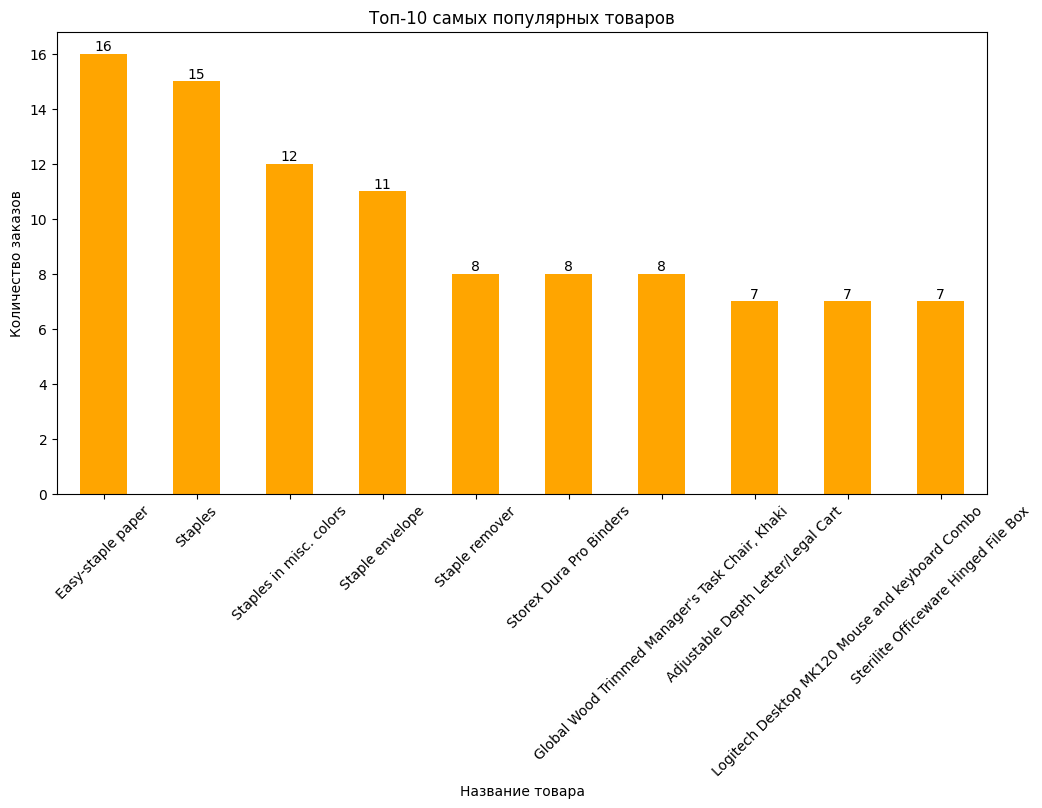

## Выводы:
- Самые популярные товары - это Easy-staple paper, Staples, Staples in misc. colors, Staple envelope, Staple remover, Storex Dura Pro Binders, Global Wood Trimmed Manager's Task Chair, Khaki, Adjustable Depth Letter/Legal Cart, Logitech Desktop MK120 Mouse and keyboard Combo, Sterilite Officeware Hinged File Box
- На основе полученных данных можно сделать вывод о предпочтениях покупателей и использовать эту информацию для оптимизации ассортимента.
- Также можно использовать данные о популярности товаров для планирования закупок.


In [37]:
import pandas as pd
import matplotlib.pyplot as plt

# Преобразуем столбец 'Orderdate' в формат даты
df['Orderdate'] = pd.to_datetime(df['Orderdate'])

# Переименовываем столбец 'Sub-Category'
df.rename(columns={'Sub-Category': 'SubCategory'}, inplace=True)

# Группируем данные по товарам и считаем количество заказов
product_counts = df.groupby('Productname')['Orderid'].count().sort_values(ascending=False)

# Выводим Топ-10 товаров
top_products = product_counts.head(10)

# Строим столбчатую диаграмму
plt.figure(figsize=(12, 6))
ax = top_products.plot(kind='bar', color='#FFA500')  # Оранжевый цвет
plt.title('Топ-10 самых популярных товаров')
plt.xlabel('Название товара')
plt.ylabel('Количество заказов')
plt.xticks(rotation=45)

# Добавляем подписи значений над столбцами
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='bottom', fontsize=10)

plt.show()

# Выводы
print("## Выводы:")
print("- Самые популярные товары - это", ", ".join(top_products.index.tolist()))
print("- На основе полученных данных можно сделать вывод о предпочтениях покупателей и использовать эту информацию для оптимизации ассортимента.")
print("- Также можно использовать данные о популярности товаров для планирования закупок.")



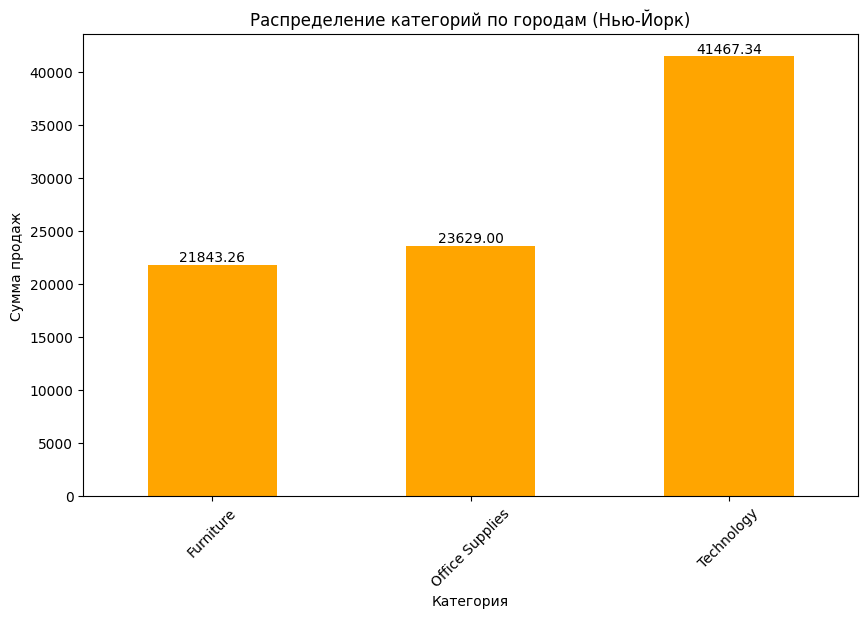

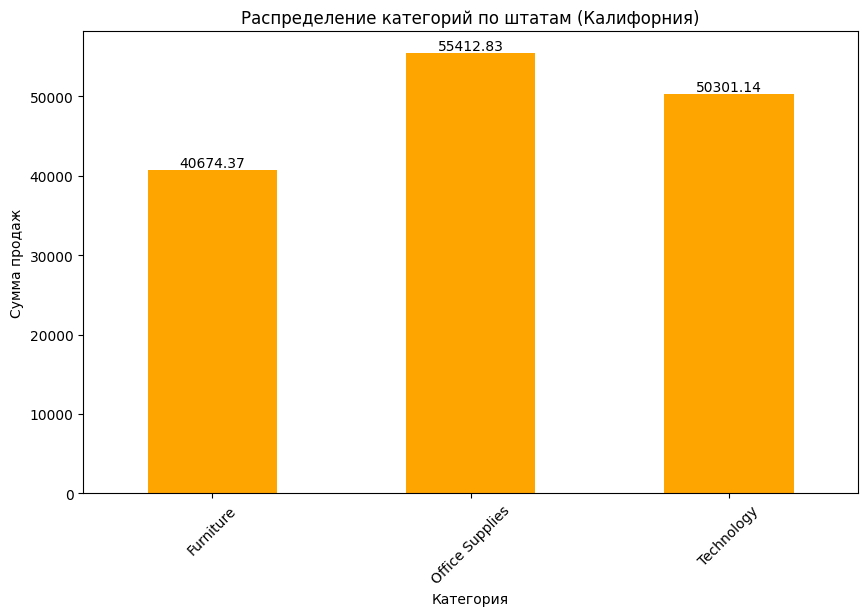

## Выводы:
- В Нью-Йорке наблюдается высокий спрос на товары из категории 'Office Supplies', что может быть связано с большим количеством офисных работников в этом городе.
- В Калифорнии также доминирует категория 'Office Supplies', но продажи в категории 'Technology' более значительны по сравнению с Нью-Йорком, что может указывать на более высокую концентрацию технологических компаний в этом штате.


In [38]:
import pandas as pd
import matplotlib.pyplot as plt

# Преобразуем столбец 'Orderdate' в формат даты
df['Orderdate'] = pd.to_datetime(df['Orderdate'])

# 1. Распределение категорий по городам (Нью-Йорк)
city_category_sales = df[df['City'] == 'New York City'].groupby('Category')['Sales'].sum()

plt.figure(figsize=(10, 6))
ax = city_category_sales.plot(kind='bar', color='#FFA500')
plt.title('Распределение категорий по городам (Нью-Йорк)')
plt.xlabel('Категория')
plt.ylabel('Сумма продаж')
plt.xticks(rotation=45)

# Добавляем подписи значений над столбцами
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='bottom', fontsize=10)

plt.show()

# 2. Распределение категорий по штатам (Калифорния)
state_category_sales = df[df['State'] == 'California'].groupby('Category')['Sales'].sum()

plt.figure(figsize=(10, 6))
ax = state_category_sales.plot(kind='bar', color='#FFA500')
plt.title('Распределение категорий по штатам (Калифорния)')
plt.xlabel('Категория')
plt.ylabel('Сумма продаж')
plt.xticks(rotation=45)

# Добавляем подписи значений над столбцами
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='bottom', fontsize=10)

plt.show()

# Выводы
print("## Выводы:")
print("- В Нью-Йорке наблюдается высокий спрос на товары из категории 'Office Supplies', что может быть связано с большим количеством офисных работников в этом городе.")
print("- В Калифорнии также доминирует категория 'Office Supplies', но продажи в категории 'Technology' более значительны по сравнению с Нью-Йорком, что может указывать на более высокую концентрацию технологических компаний в этом штате.")


Выводы:
- В Нью-Йорке наблюдается высокий спрос на товары из категории 'Office Supplies', что может быть связано с большим количеством офисных работников в этом городе.
- В Калифорнии также доминирует категория 'Office Supplies', но продажи в категории 'Technology' более значительны по сравнению с Нью-Йорком, что может указывать на более высокую концентрацию технологических компаний в этом штате.

<ipython-input-39-c1a63e508db6>:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  sales_by_date_category = df.groupby([pd.Grouper(key='Orderdate', freq='M'), 'Category'])['Sales'].sum().reset_index()
<ipython-input-39-c1a63e508db6>:11: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  sales_by_date_subcategory = df.groupby([pd.Grouper(key='Orderdate', freq='M'), 'Subcategory'])['Sales'].sum().reset_index()
<ipython-input-39-c1a63e508db6>:34: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  sales_by_date = df.groupby(pd.Grouper(key='Orderdate', freq='M'))['Sales'].sum().reset_index()


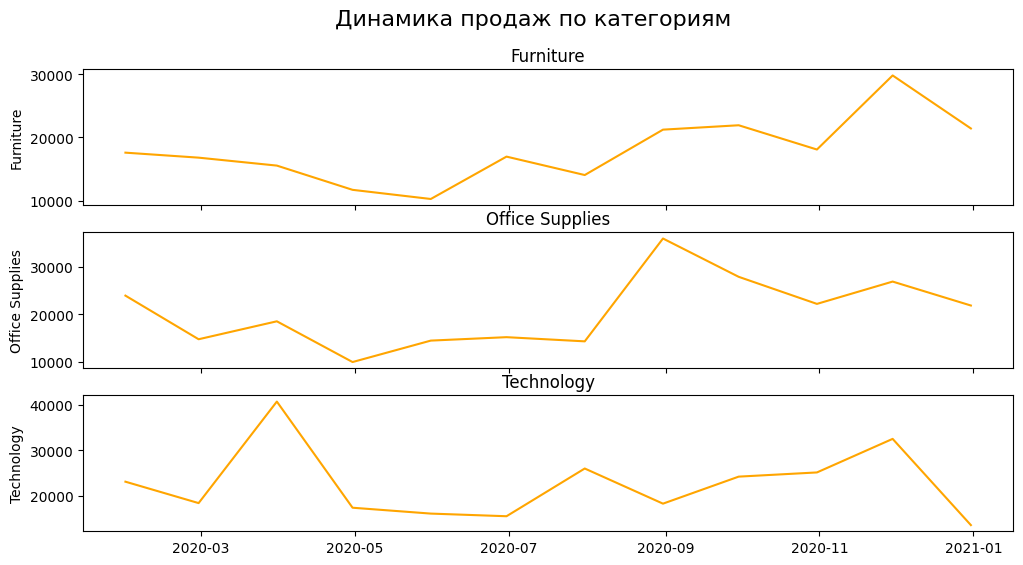

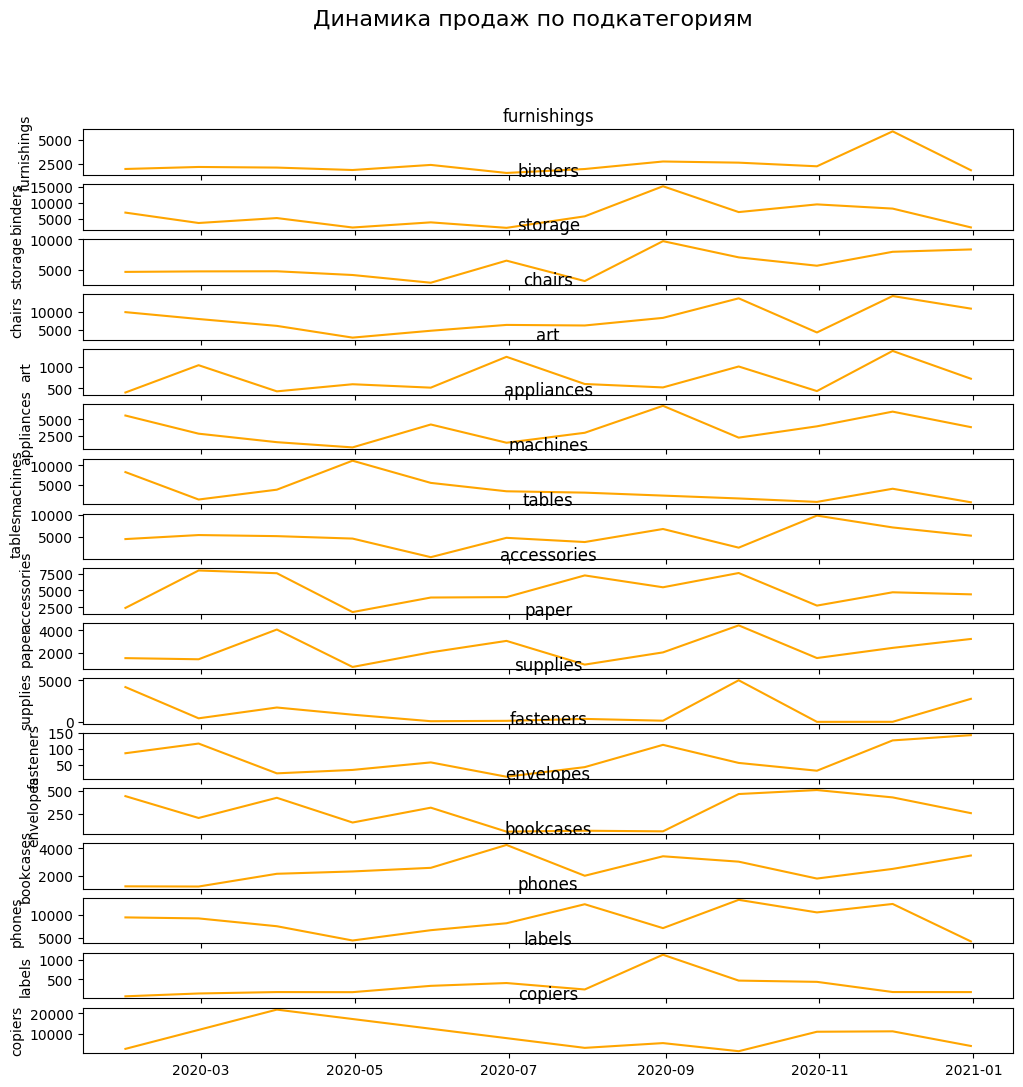

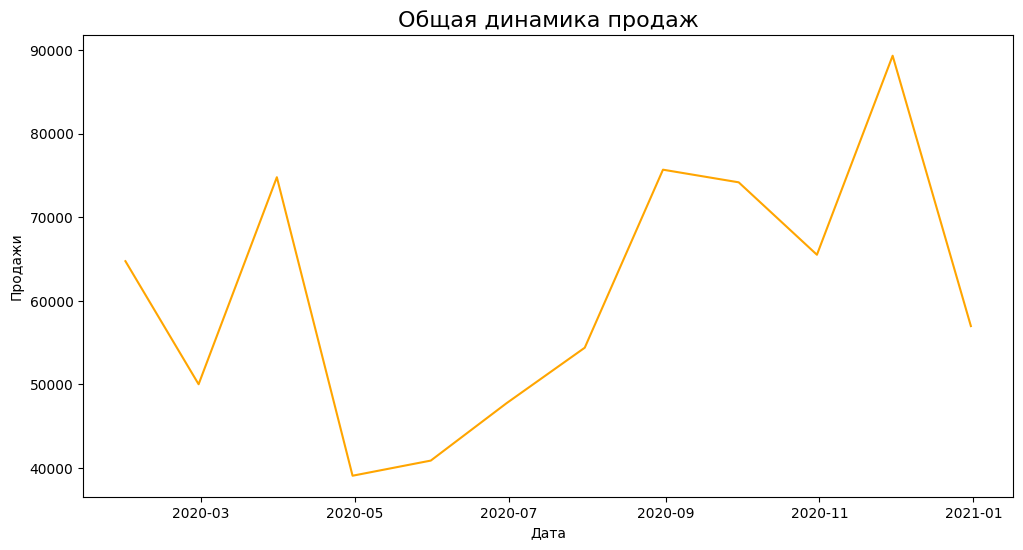

In [39]:
import pandas as pd
import matplotlib.pyplot as plt

# Преобразуем столбец 'Orderdate' в формат даты
df['Orderdate'] = pd.to_datetime(df['Orderdate'])

# Группируем данные по дате и категории для суммирования продаж
sales_by_date_category = df.groupby([pd.Grouper(key='Orderdate', freq='M'), 'Category'])['Sales'].sum().reset_index()

# Группируем данные по дате и подкатегории для суммирования продаж
sales_by_date_subcategory = df.groupby([pd.Grouper(key='Orderdate', freq='M'), 'Subcategory'])['Sales'].sum().reset_index()

# Строим графики для каждой категории
fig, axes = plt.subplots(figsize=(12, 6), nrows=len(df['Category'].unique()), sharex=True)
fig.suptitle('Динамика продаж по категориям', fontsize=16)

for i, category in enumerate(df['Category'].unique()):
    sales_category = sales_by_date_category[sales_by_date_category['Category'] == category]
    axes[i].plot(sales_category['Orderdate'], sales_category['Sales'], color='orange')
    axes[i].set_ylabel(category)
    axes[i].set_title(category, fontsize=12)

# Строим графики для каждой подкатегории
fig, axes = plt.subplots(figsize=(12, 12), nrows=len(df['Subcategory'].unique()), sharex=True)
fig.suptitle('Динамика продаж по подкатегориям', fontsize=16)

for i, subcategory in enumerate(df['Subcategory'].unique()):
    sales_subcategory = sales_by_date_subcategory[sales_by_date_subcategory['Subcategory'] == subcategory]
    axes[i].plot(sales_subcategory['Orderdate'], sales_subcategory['Sales'], color='orange')
    axes[i].set_ylabel(subcategory)
    axes[i].set_title(subcategory, fontsize=12)

# Строим график общей динамики продаж
sales_by_date = df.groupby(pd.Grouper(key='Orderdate', freq='M'))['Sales'].sum().reset_index()
plt.figure(figsize=(12, 6))
plt.plot(sales_by_date['Orderdate'], sales_by_date['Sales'], color='orange')
plt.title('Общая динамика продаж', fontsize=16)
plt.xlabel('Дата')
plt.ylabel('Продажи')

# Выводим графики
plt.show()

# Анализ результатов:
# 1. Определите пики и спады продаж для каждой категории и подкатегории на графиках.
# 2. Сравните пики и спады с общей динамикой продаж.
# 3. Сделайте выводы о причинах пиков и спадов. Например, сезонность, рекламные кампании, изменения цен, новые продукты.
# 4. Проверьте, есть ли корреляция между пиками и спадами в разных категориях и подкатегориях.
# 5. Опишите основные тенденции в продажах каждой категории и подкатегории.


Анализ динамики продаж по категориям и подкатегориям выявил следующие особенности:

Категория "Office Supplies":

Обнаруживается стабильный рост продаж в течение всего периода, с пиками в апреле и октябре.
При этом, внутри категории наблюдаются различия в динамике продаж по подкатегориям.
"Binders" демонстрируют наиболее стабильный рост, без значительных спадов.
"Paper" показывает более выраженные сезонные колебания, с пиками в марте, апреле, июле и октябре и спадами в мае и ноябре.
"Storage"  также демонстрирует выраженные сезонные колебания, но с пиками в сентябре, ноябре и спадами в мае, июле.

Категория "Furniture":

Обнаруживается менее стабильная динамика продаж, с заметным сезонным фактором.
"Chairs" показывает выраженные пики продаж в июле и снтябре и спады в [июле и августе.
"Tables" демонстрирует более сглаженную динамику, но также с заметными пиками в августе, октябре и ноябре.
"Bookcases"  отличается менее стабильной динамикой, с резкими скачками январе, апреле, октябре и ноябре и спадами продаж с июля по сентябрь.

Категория "Technology":

Обнаруживается наиболее стабильная динамика продаж, с небольшими сезонными колебаниями.
"Phones" демонстрирует сравнительно стабильный рост продаж, с незначительными сезонными спадами в январе, августе и ноябре.
"Copiers"  отличается более выраженными сезонными колебаниями.
"Machines"  имеет относительно стабильную динамику продаж, с незначительными сезонными колебаниями.

Сравнение продаж в подкатегориях с общей динамикой продаж:

В целом, динамика продаж в подкатегориях отражает общую тенденцию динамики продаж,  но с некоторыми нюансами.
Например, пики продаж в подкатегории "Chairs"  совпадают с пиками продаж в целом, но спады в "Chairs"  более выражены.
В то же время, подкатегория "Binders" показывает более стабильный рост, чем общая динамика продаж.
Это свидетельствует о том, что динамика продаж в подкатегориях может быть  не всегда  совпадать  с общей динамикой продаж,  и  важно анализировать динамику  в каждой  подкатегории  отдельно.

Вывод:

Анализ динамики продаж позволяет выявить сезонные колебания в продажах отдельных категорий и подкатегорий, а также определить наиболее популярные товары в каждом периоде.  Эта информация  может  быть  использована  для  улучшения  планирования  закупок,  управления  запасами,  и  проведения  целевых  маркетинговых  кампаний.

#SUMMARY

1. Количество уникальных заказов в рассматриваемом периоде: 1687
2. Количество уникальных клиентов в рассматриваемом периоде: 693
3. Распределение Топ-20 заказов по географии следующее:

   По регионам:
-  наибольшее количество заказов из региона West - 1095,
- наименьшее количество заказов из региона South - 518

   По штатам:
- больше всего заказов штат California - 306
- меньше всего заказов из Distict of Columbia - 2

   По городам:
- больше всего заказов сделано в New York - 663
- меньше всего заказов в Rochester - 24
4. Рапределение заказов по датам:
- Наибольшее количество заказов было в марте - 304, сентябре - 385, ноябре - 375
- Меньше всего заказов в январе - 226, апреле и июне - 229

Динамика заказов по дням внутри месяца представлена на графиках. Отмечены всплески количества заказов с 10 по 15 числа каждого месяца.
С августа по декабрь интенсивность заказов внутри месяца возврастает и рапределена более равномерно
5. Динамика продаж:
 - Максимальные продажи в ноябре - 89306, августе - 75675, марте - 74774 и сентябре - 74164
 - Минимальные продажи в аапреле 39072 и мае 40882
6. Распределение продаж по категорям и подкатегориям
- Наибольшие продажи в категории Technology - 271730
- Наибольшие продажи в подкатегориях
Phones - 105340 и
Chairs - 95554
- Меньше всего продажи в подкатегории Fasteners - 857
7. Распределение продаж по географии:
- Наибольший объем продаж приходится на города Нью-Йорк, Лос-Анджелес и Сан-Франциско.
- Топ-20 штатов по объему продаж возглавляют Калифорния, Нью-Йорк и Техас, что соответствует крупнейшим экономическим центрам США.
- Больше всего продаж приходится на регион Востока, что может объясняться как более высокой плотностью населения, так и более развитой экономикой
- В Нью-Йорке наблюдается высокий спрос на товары из категории 'Office Supplies', что может быть связано с большим количеством офисных работников в этом городе.
- В Калифорнии также доминирует категория 'Office Supplies', но продажи в категории 'Technology' более значительны по сравнению с Нью-Йорком, что может указывать на более высокую концентрацию технологических компаний в этом штате.
8. Продажи по товарам:
- Самые популярные товары - это Easy-staple paper, Staples, Staples in misc. colors, Staple envelope, Staple remover, Storex Dura Pro Binders, Global Wood Trimmed Manager's Task Chair, Khaki, Adjustable Depth Letter/Legal Cart, Logitech Desktop MK120 Mouse and keyboard Combo, Sterilite Officeware Hinged File Box
- На основе полученных данных можно сделать вывод о предпочтениях покупателей и использовать эту информацию для оптимизации ассортимента.
- Также можно использовать данные о популярности товаров для планирования закупок.
9. Анализ динамики продаж по категориям и подкатегориям выявил следующие особенности:

Категория "Office Supplies":

Обнаруживается стабильный рост продаж в течение всего периода, с пиками в апреле и октябре. При этом, внутри категории наблюдаются различия в динамике продаж по подкатегориям. "Binders" демонстрируют наиболее стабильный рост, без значительных спадов. "Paper" показывает более выраженные сезонные колебания, с пиками в марте, апреле, июле и октябре и спадами в мае и ноябре. "Storage" также демонстрирует выраженные сезонные колебания, но с пиками в сентябре, ноябре и спадами в мае, июле.

Категория "Furniture":

Обнаруживается менее стабильная динамика продаж, с заметным сезонным фактором. "Chairs" показывает выраженные пики продаж в июле и снтябре и спады в [июле и августе. "Tables" демонстрирует более сглаженную динамику, но также с заметными пиками в августе, октябре и ноябре. "Bookcases" отличается менее стабильной динамикой, с резкими скачками январе, апреле, октябре и ноябре и спадами продаж с июля по сентябрь.

Категория "Technology":

Обнаруживается наиболее стабильная динамика продаж, с небольшими сезонными колебаниями. "Phones" демонстрирует сравнительно стабильный рост продаж, с незначительными сезонными спадами в январе, августе и ноябре. "Copiers" отличается более выраженными сезонными колебаниями. "Machines" имеет относительно стабильную динамику продаж, с незначительными сезонными колебаниями.

Сравнение продаж в подкатегориях с общей динамикой продаж:

В целом, динамика продаж в подкатегориях отражает общую тенденцию динамики продаж, но с некоторыми нюансами. Например, пики продаж в подкатегории "Chairs" совпадают с пиками продаж в целом, но спады в "Chairs" более выражены. В то же время, подкатегория "Binders" показывает более стабильный рост, чем общая динамика продаж. Это свидетельствует о том, что динамика продаж в подкатегориях может быть не всегда совпадать с общей динамикой продаж, и важно анализировать динамику в каждой подкатегории отдельно.

Вывод:

Анализ динамики продаж позволяет выявить сезонные колебания в продажах отдельных категорий и подкатегорий, а также определить наиболее популярные товары в каждом периоде. Эта информация может быть использована для улучшения планирования закупок, управления запасами, и проведения целевых маркетинговых кампаний.